In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [40]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [41]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [42]:
region_df.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [43]:
print(df.shape)
print(region_df.shape)

(271116, 15)
(230, 3)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [45]:
df = df[df["Season"]== 'Summer']

In [46]:
df.shape

(222552, 15)

In [47]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
dtype: int64

In [48]:
region_df.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [49]:
df = df.merge(region_df, on = "NOC", how='left')

In [50]:
df['region'].unique().shape

(206,)

In [51]:
df.duplicated().sum()

1385

In [52]:
df.drop_duplicates(inplace=True)

In [53]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

#### One hot encode

In [54]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [55]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

C:\Users\uqba2\AppData\Local\Temp\ipykernel_5568\1495869468.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [56]:
df[(df['NOC'] == "IND") & (df['Medal']== 'Gold') ]              # filter

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [57]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [58]:
medal_tally1 = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

C:\Users\uqba2\AppData\Local\Temp\ipykernel_5568\3611514703.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [59]:
medal_tally1[medal_tally1['NOC']== 'IND']

NOC  Gold  Silver  Bronze
53  IND     9       7      12

In [60]:
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

C:\Users\uqba2\AppData\Local\Temp\ipykernel_5568\1449148809.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [61]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [62]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')

In [63]:
df['region'].dropna().values.tolist()

['China',
 'China',
 'Denmark',
 'Denmark',
 'Netherlands',
 'Netherlands',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Norway',
 'Romania',
 'Norway',
 'Norway',
 'Norway',
 'Netherlands',
 'Norway',
 'Norway',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Estonia',
 'Norway',
 'Finland',
 'Finland',
 'France',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Morocco',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 'Spain',
 '

In [64]:
country=np.unique(df['region'].dropna().values).tolist()
country.sort()
country.insert(0, 'Overall')

In [65]:
medal_df= df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [66]:
def fetch_medal_tally( year, country):
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]

    if flag == 1:
        var= temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        var = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',
                                                                                      ascending=False).reset_index()
    var['total'] = var['Gold'] + var['Silver'] + var['Bronze']
    print(var)

In [67]:
fetch_medal_tally(year='Overall', country='Overall')

            region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]


C:\Users\uqba2\AppData\Local\Temp\ipykernel_5568\1947144311.py:16: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Overall Analysis
- No. of editions
- No. of cities
- No. of events/sports
- No. of athletes
- participating Nations

In [68]:
df['Year'].unique().shape

(29,)

In [69]:
df['Year'].unique().shape[0] -1

28

In [70]:
print(df['Year'].unique().shape)
print(df['Event'].unique().shape)
print(df['Name'].unique().shape)
print(df['City'].unique().shape)

(29,)
(651,)
(116122,)
(23,)


In [71]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [72]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('index')
nations_over_time.rename(columns={'index':"year", "Year": "No of Countries"}, inplace=True)          # Rename Columne

In [73]:
# Q-3
nations_over_time

year  No of Countries
28  1896               12
22  1900               31
27  1904               14
26  1906               20
25  1908               22
24  1912               29
23  1920               29
21  1924               45
20  1928               46
19  1932               47
18  1936               49
17  1948               59
16  1952               67
15  1956               71
13  1960               83
11  1964               93
10  1968              111
9   1972              120
12  1976               91
14  1980               80
8   1984              139
7   1988              156
6   1992              168
5   1996              196
4   2000              199
3   2004              200
2   2008              202
1   2012              203
0   2016              204

In [74]:
import chart_studio
username='uqba'
api_key = "VpoQtqpj6LUCf5VCBQUV"
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [75]:
import chart_studio.plotly as py
import chart_studio.tools as tls

In [76]:
# participating Over the years
fig = px.line(nations_over_time, x="year", y = "No of Countries",  title="Participating Nation Over Years")
fig.show()
py.plot(fig, filename="plotly_scatter", auto_open = True)

'https://plotly.com/~uqba/1/'

In [77]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('index')
events_over_time.rename(columns={'index':"year", "Year": "Events"}, inplace=True)

In [78]:
fig = px.line(events_over_time, x="year", y = "Events", title="Events Over Years")
fig.show()
py.plot(fig, filename="plotly_scatter1", auto_open = True)

'https://plotly.com/~uqba/4/'

In [79]:
athletes_over_time = df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_over_time.rename(columns={'index':"year", "Year": "Name"}, inplace=True)

In [80]:
fig = px.line(athletes_over_time, x="year", y = "Name", title="Athletes Over Years")
py.plot(fig, filename="plotly_scatter2", auto_open = True)
fig.show()

In [81]:
df.dropna(subset=['Medal'])['Name'].value_counts().reset_index().merge(df, left_on='index', right_on='Name', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates('index').head(10)

index  Name_x       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                       Borys Anfiyanovych Shakhlin      13  Gymnastics   
97                                       Takashi Ono      13  Gymnastics   
130                              Edoardo Mangiarotti      13     Fencing   
144             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
157                          Aleksey Yuryevich Nemov      12  Gymnastics   
178  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
195                           Birgit Fischer-Schmidt      12    Canoeing   

      region  
0        USA  
30    Russia  
49    Russia  
73    Russia  
97     Japan  
130    Italy  
144      USA  
157   Russia  
178      USA  
195  Germany

In [82]:
# Successful athletes
def most_successful(df, sport):
    func_df = df.dropna(subset=['Medal'])

    if sport != "Overall":
        func_df = func_df[func_df['Sport']==sport]
    x = func_df['Name'].value_counts().reset_index().merge(df, left_on = 'index', right_on='Name', how='left')[['index','Name_x', 'Sport', 'region']].drop_duplicates('index')
    x.rename(columns={'index':'Name', "Name_x":'Medals'}, inplace=True)   
    return x

In [83]:
most_successful(df, 'Gymnastics')

Name  Medals       Sport   region
0     Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   Russia
19          Nikolay Yefimovich Andrianov      15  Gymnastics   Russia
43           Borys Anfiyanovych Shakhlin      13  Gymnastics   Russia
67                           Takashi Ono      13  Gymnastics    Japan
100                           Sawao Kato      12  Gymnastics    Japan
...                                  ...     ...         ...      ...
8404              Valdemar Jensen Bggild       1  Gymnastics  Denmark
8405                     milie Le Pennec       1  Gymnastics   France
8411                        Rolf Lefdahl       1  Gymnastics   Norway
8412               Marius Ludvig Lefevre       1  Gymnastics  Denmark
8413    Pamela Jean "Pam" Bileck (-Flat)       1  Gymnastics      USA

[1315 rows x 4 columns]

In [84]:
# drop duplicates where medal doesn't won
func_df = df.dropna(subset = ['Medal'])
func_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\uqba2\AppData\Local\Temp\ipykernel_5568\3342021388.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
new_df=func_df[func_df['region']=='USA']
new_df.groupby('Year').count()['Medal']

Year
1896     19
1900     54
1904    231
1906     23
1908     46
1912     63
1920     95
1924     99
1928     56
1932    110
1936     57
1948     84
1952     76
1956     74
1960     71
1964     90
1968    107
1972     94
1976     94
1984    173
1988     94
1992    108
1996    101
2000     91
2004    101
2008    110
2012    103
2016    121
Name: Medal, dtype: int64

### Country Wise - Sports Wise - Medal Tally
- Countrywise medal tally per year(line plot)
- What country are good at heat map
- Most successful Athleyes(Top-10)

<AxesSubplot:xlabel='Year', ylabel='Sport'>

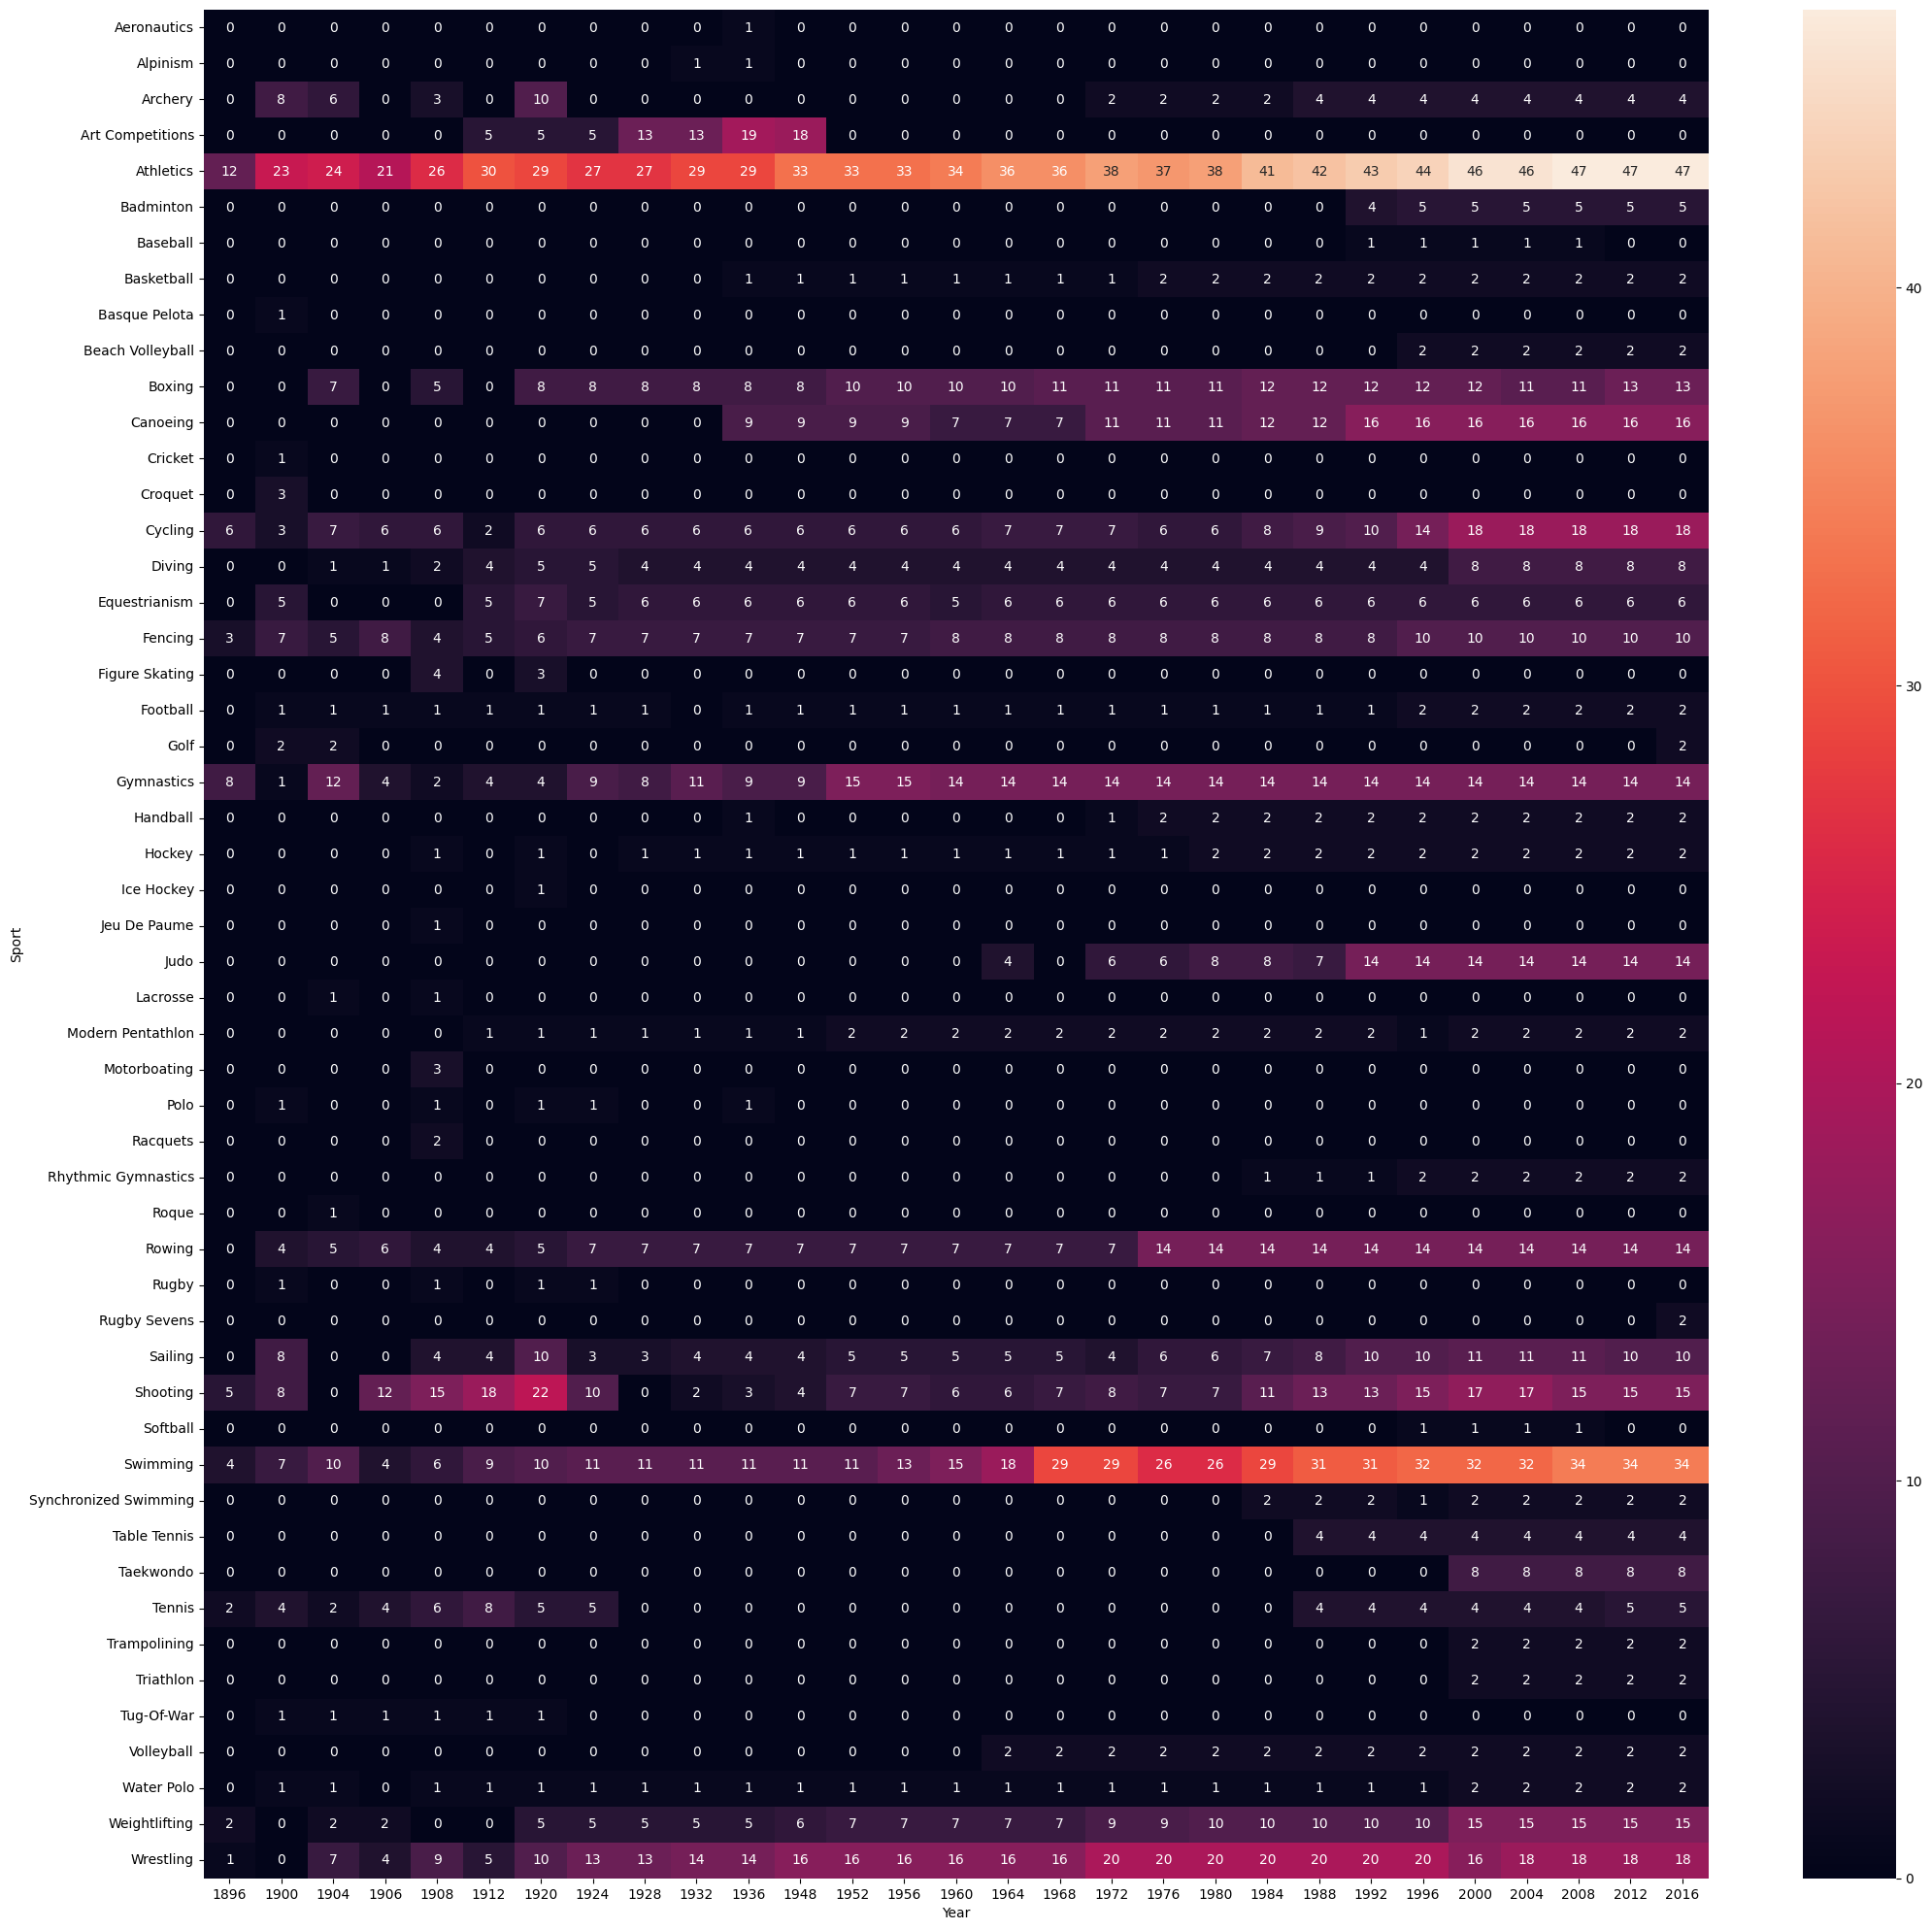

In [86]:
plt.figure(figsize = (25, 25))
sns.heatmap(x.pivot_table(index='Sport', columns = 'Year', values= 'Event', aggfunc='count').fillna(0).astype('int'), annot=True)

In [118]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)
temp_df.groupby('Year').count()['Medal']

Year
1896    120
1900    300
1904    280
1906    224
1908    322
1912    316
1920    449
1924    391
1928    356
1932    370
1936    422
1948    439
1952    457
1956    467
1960    461
1964    501
1968    527
1972    600
1976    613
1980    631
1984    685
1988    738
1992    814
1996    841
2000    925
2004    927
2008    963
2012    962
2016    973
Name: Medal, dtype: int64

In [112]:
new_df=temp_df[temp_df['region']=='India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [113]:
fig = px.line(final_df, x="Year", y = "Medal")
py.plot(fig, filename="plotly_scatter3", auto_open = True)
fig.show()

<AxesSubplot:xlabel='Year', ylabel='Sport'>

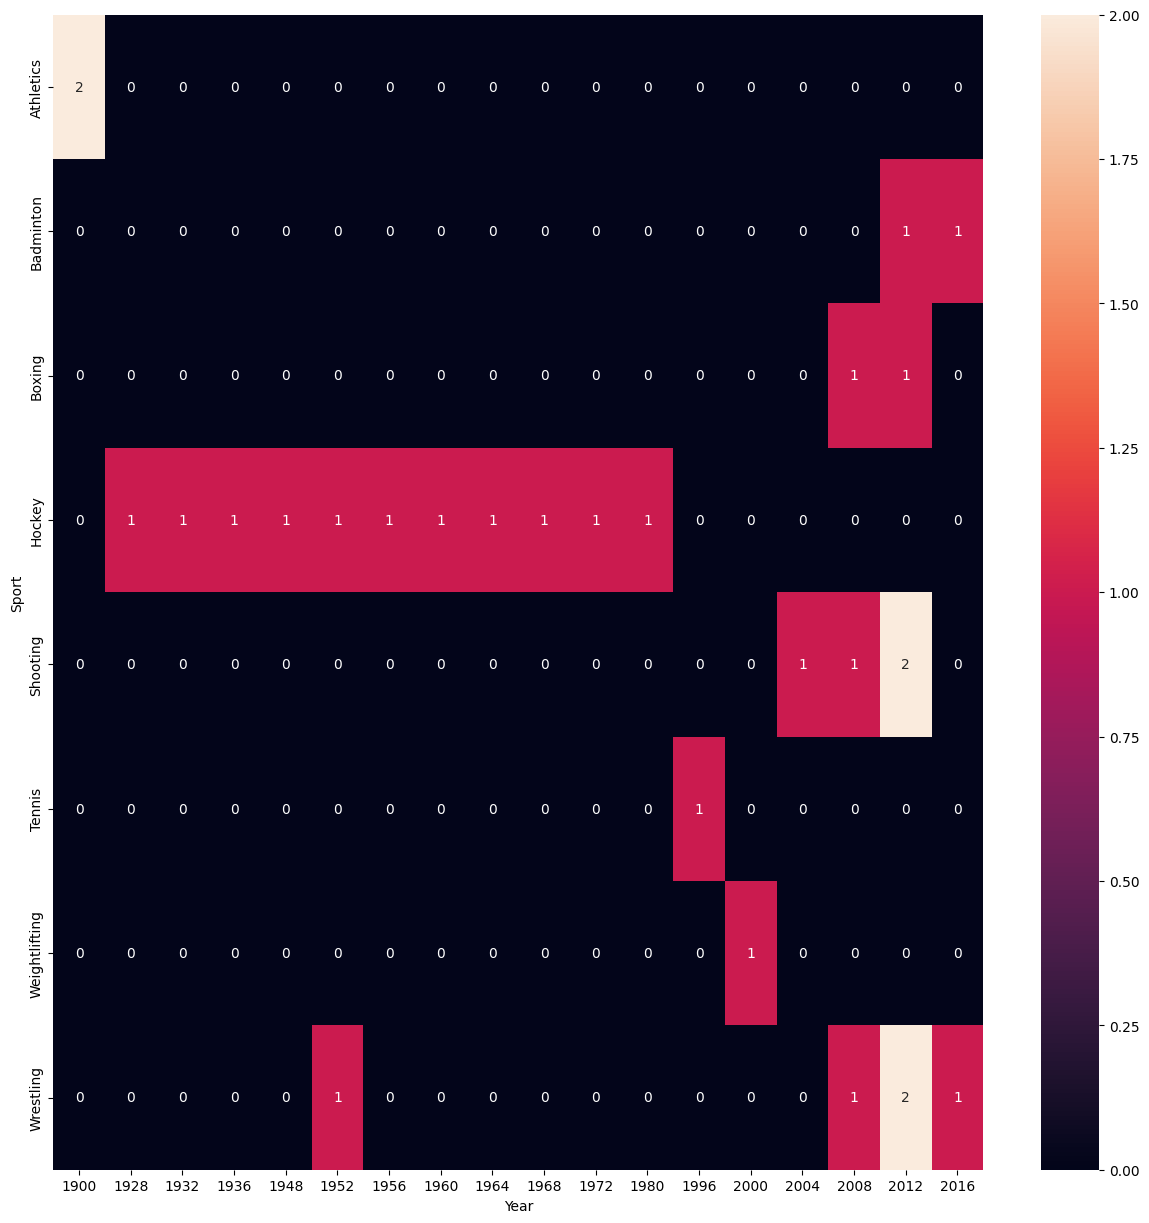

In [117]:
new_df=temp_df[temp_df['region']=='India']
plt.figure(figsize=(15, 15))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

### Over All Top 15 Athelets - Sports wise

In [89]:
# Successful athletes
def most_successful(df, country):
    func_df = df.dropna(subset=['Medal'])
    func_df = func_df[func_df['region']== country]

    x = func_df['Name'].value_counts().reset_index().merge(df, left_on = 'index', right_on='Name', how='left')[['index','Name_x', 'Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name', "Name_x":'Medals'}, inplace=True)   
    return x

In [90]:
most_successful(df, 'India')

Name  Medals   Sport
0               Udham Singh Kular       4  Hockey
4          Leslie Walter Claudius       4  Hockey
8           Shankar Pillay Laxman       3  Hockey
11            Ranganathan Francis       3  Hockey
14            Richard James Allen       3  Hockey
..                            ...     ...     ...
252           Ahsan Muhammad Khan       1  Hockey
253               Ahmed Sher Khan       1  Hockey
254       Maharaj Krishon Kaushik       1  Hockey
255  Patrick Anthony "Pat" Jansen       1  Hockey
256          Sayed Muhammad Yusuf       1  Hockey

[141 rows x 3 columns]

### Athlete wise Analysis

In [91]:
import plotly.figure_factory as ff

In [92]:
athlete_df = df.drop_duplicates(subset=['Name', 'region'])

In [93]:
fig = ff.create_distplot([athlete_df['Age'].dropna()], ['Age Distribution'])
fig.show()

In [94]:
var1 = athlete_df['Age'].dropna()
var2 = athlete_df[athlete_df['Medal']== 'Gold']['Age'].dropna()
var3 = athlete_df[athlete_df['Medal']== 'Silver']['Age'].dropna()
var4 = athlete_df[athlete_df['Medal']== 'Bronze']['Age'].dropna()

In [95]:
fig = ff.create_distplot([var1, var2, var3, var4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug = False)
py.plot(fig, filename="plotly_scatter4", auto_open = True)
fig.show()

In [96]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [97]:
listt = []
name = []
for sport in famous_sports:
    func_df = athlete_df[athlete_df['Sport']==sport]
    listt.append(func_df[func_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [98]:
fig = ff.create_distplot(listt, name, show_hist= False, show_rug= False)
fig.update_layout(autosize = False, width = 1000, height = 600, title_text="Distribution of Age with respect to Sports(Gold Medalist)")
fig.show()


In [99]:
x = []
name = []
for sport in famous_sports:
    func_df = athlete_df[athlete_df['Sport']==sport]
    x.append(func_df[func_df['Medal']=='Silver']['Age'].dropna())
    name.append(sport)

In [100]:
fig = ff.create_distplot(x, name, show_hist= False, show_rug= False)
fig.update_layout(autosize = False, width = 1000, height = 600, title_text="Distribution of Age with respect to Sports(Silver Medalist)")

fig.show()

### Height - Weight Comparision

In [101]:
athlete_df['Medal'].fillna("No Medal", inplace = True)

c:\Users\uqba2\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



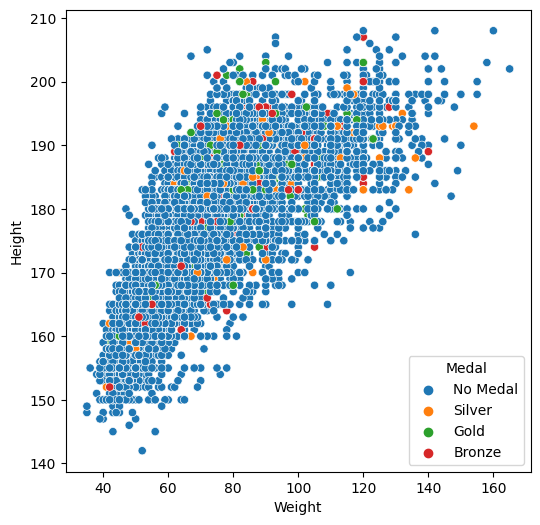

In [119]:
plt.figure(figsize=(6, 6))
temp_df= athlete_df[athlete_df['Sport']== 'Athletics']
sns.scatterplot(temp_df['Weight'], athlete_df['Height'], hue=temp_df['Medal'])
plt.show()

In [103]:
func_df = athlete_df[athlete_df['Sport']==sport]

c:\Users\uqba2\miniconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



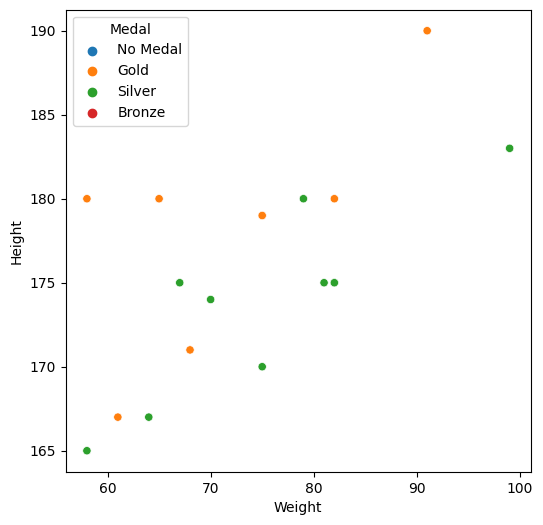

In [104]:
plt.figure(figsize=(6, 6))
athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(func_df['Weight'], func_df['Height'], hue=func_df['Medal'])
plt.show()

### Over the Year Man VS Female Participation

In [105]:
men = athlete_df[athlete_df['Sex']=="M"].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=="F"].groupby('Year').count()['Name'].reset_index()

In [106]:
final = men.merge(women, on='Year', how='left')
final.rename(columns= {"Name_x": 'Male', "Name_y":'Female'}, inplace= True)

In [107]:
final.fillna(0, inplace=True)

In [108]:
fig = px.line(final, x='Year', y = ["Male", "Female"])
py.plot(fig, filename="plotly_scatter7", auto_open = True)
fig.show()